In [84]:
# importing packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
from collections import defaultdict
labelEncoder_dict = defaultdict(LabelEncoder)
from scipy import stats 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn import svm

## Data Cleaning

In [85]:
# Loading file data
df = pd.read_csv("stackoverflow_data.csv")

In [86]:
X = pd.DataFrame()
X['OpenSource'] = df['OpenSource'].eq('Yes').mul(1)
X['Hobby'] = df['Hobby'].eq('Yes').mul(1)
X['Student'] = df['Student'].str.contains('Yes').mul(1)

In [87]:
# YearsCoding
YearCodingMap = {
    '3-5 years':4,
    '30 or more years':30, 
    '24-26 years':25, 
    '18-20 years':19,
    '6-8 years':7, 
    '9-11 years':10, 
    '0-2 years':1,
    '15-17 years':16,
    '12-14 years':13, 
    '21-23 years':22, 
    '27-29 years':28,
}
X['YearsCoding'] = df['YearsCoding'].replace(YearCodingMap)
X['YearsCoding'].fillna(X['YearsCoding'].mean(),inplace=True)

In [88]:
companySizeMap = {
    '20 to 99 employees':60,
    '10,000 or more employees':10000,
    '100 to 499 employees':300, 
    '10 to 19 employees':15,
    '500 to 999 employees':750, 
    '1,000 to 4,999 employees':3000,
    '5,000 to 9,999 employees':7500, 
    'Fewer than 10 employees':10
}
X['CompanySize'] = df['CompanySize'].replace(companySizeMap)
X.dropna(subset=["CompanySize"],inplace=True) #Droping NaN values

In [89]:
# Formal Education
dummy1 = pd.get_dummies(df['FormalEducation'], drop_first=True) 
dummy1.drop(['I never completed any formal education','Primary/elementary school','Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)','Some college/university study without earning a degree'],axis=1,inplace=True)
X.join(dummy1)

,OpenSource,Hobby,Student,YearsCoding,CompanySize,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)","Professional degree (JD, MD, etc.)"
0,0,1,0,4.0,60.0,1,0,0,0
1,1,1,0,30.0,10000.0,1,0,0,0
2,1,1,0,25.0,60.0,0,0,0,0
3,0,0,0,19.0,300.0,1,0,0,0
4,0,1,1,7.0,10000.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
71526,0,1,0,7.0,10.0,0,0,0,0
71527,0,1,1,4.0,750.0,1,0,0,0
71528,0,1,0,10.0,10.0,1,0,0,0
71529,1,1,0,7.0,10000.0,1,0,0,0


In [90]:
# AssessJob and Benefits Added
df.fillna(df.iloc[:,17:38].mean(),inplace=True)
for col in df.iloc[:,17:38].columns:
    X[col] = df[col]

In [91]:
# JobSatisfaction Mapping
SatisfactionMapping = {
    'Extremely satisfied':6,
    'Moderately satisfied':5, 
    'Slightly satisfied':4,
    'Neither satisfied nor dissatisfied':3,
    'Moderately dissatisfied':2,
    'Slightly dissatisfied':1,
    'Extremely dissatisfied':0
}

df['JobSatisfaction'].replace(SatisfactionMapping,inplace=True)
df.fillna({'JobSatisfaction':3},inplace=True)
X['JobSatisfaction'] = df['JobSatisfaction']

# CareerSatisfaction
df['CareerSatisfaction'].replace(SatisfactionMapping,inplace=True)
df.fillna({'CareerSatisfaction':3},inplace=True)
X['CareerSatisfaction'] = df['CareerSatisfaction']

In [92]:
# HackathonReasons
X['HackathonParticipated'] = df['HackathonReasons'].notna()*1

# ConvertedSalary
X['ConvertedSalary'] = df['ConvertedSalary']
X.dropna(subset=["ConvertedSalary"],inplace=True) #Droping NaN values

### One Hot Encoding

In [93]:
def CustomOneHotEncoding(data,X):
    temp = data.str.split(';', expand=True)
    new_columns = pd.unique(temp.values.ravel())
    for col in new_columns:
        if col is not None and col is not np.NaN:
            X[col] = data.str.contains(col, regex=False).fillna(False)*1

In [94]:
# LanguageWorkedWith
CustomOneHotEncoding(df['LanguageWorkedWith'],X)


CustomOneHotEncoding(df['DevType'],X)

CustomOneHotEncoding(df['DatabaseWorkedWith'],X)

CustomOneHotEncoding(df['PlatformWorkedWith'],X)

CustomOneHotEncoding(df['FrameworkWorkedWith'],X)

CustomOneHotEncoding(df['IDE'],X)

# Methodology
CustomOneHotEncoding(df['Methodology'],X)

# RaceEthnicity
CustomOneHotEncoding(df['RaceEthnicity'],X)



In [95]:
# CheckInCode
CheckInCodeMapping = {
    'Multiple times per day':730, 
    'A few times per week':156, 
    'Weekly or a few times per month':52, 
    'Never':0,
    'Less than once per month':12, 
    'Once a day':365
}

X['CheckInCode'] = df['CheckInCode'].replace(CheckInCodeMapping)
X['CheckInCode'].fillna(X['CheckInCode'].mean(),inplace=True)

In [152]:
AgeMapping = {
    '25 - 34 years old':29.5, 
    '35 - 44 years old':39.5, 
    '18 - 24 years old':21,
    '45 - 54 years old':49.5, 
    '55 - 64 years old':59.5, 
    'Under 18 years old':18,
    '65 years or older':65
}
X['Age'] = df['Age'].replace(AgeMapping)
X.dropna(subset=["Age"],inplace=True) #Droping NaN values

X['MilitaryUS'] = (df['MilitaryUS']=='Yes')*1
X['Dependents'] = (df['Dependents']=='Yes')*1
X['Gender'] = (df['Gender']=='Female')*1


In [97]:
# Exercise
ExerciseFreqMap = {
    '3 - 4 times per week':((3+4)/2)*52,
    'Daily or almost every day':365, 
    "I don't typically exercise":0, 
    '1 - 2 times per week':52
}
X['Exercise'] = df['Exercise'].replace(ExerciseFreqMap)
X['Exercise'].fillna(X['Exercise'].mean(),inplace=True)

# HoursCompMap
HoursCompMap = {
    '9 - 12 hours':10.5, 
    '5 - 8 hours':6.5, 
    'Over 12 hours':12, 
    '1 - 4 hours':2.5,
    'Less than 1 hour':1
}
X['HoursComputer'] = df['HoursComputer'].replace(HoursCompMap)
X['HoursComputer'].fillna(X['HoursComputer'].mean(),inplace=True)


In [98]:
# HypotheticalTools1-5
HypoToolMap = {
    'Extremely interested':5, 
    'Very interested':4, 
    'Somewhat interested':3, 
    'A little bit interested':2,
    'Not at all interested':1
}
hypotheticalToolsList = ['HypotheticalTools1','HypotheticalTools2','HypotheticalTools3','HypotheticalTools4','HypotheticalTools5']
for col in hypotheticalToolsList:
    X[col] = df[col].replace(HypoToolMap)
    X[col].fillna(X[col].median(),inplace=True)


In [99]:
# EducationParents -> Higher Educated Parents
EducatedParentsMap = {
    "Bachelor’s degree (BA, BS, B.Eng., etc.)":1,
    'Some college/university study without earning a degree':0,
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':0,
    "Master’s degree (MA, MS, M.Eng., MBA, etc.)":1,
    'Primary/elementary school':0, 
    'Associate degree':1,
    'They never completed any formal education':0,
    'Other doctoral degree (Ph.D, Ed.D., etc.)':1,
    'Professional degree (JD, MD, etc.)':1
}
X['ParentsWithHighEducation'] = df['EducationParents'].replace(EducatedParentsMap)
X.dropna(subset=["ParentsWithHighEducation"],inplace=True) #Droping NaN values


In [100]:
SelfTaughtValues = ['Some college/university study without earning a degree','I never completed any formal education','Primary/elementary school','Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)']
X['SelfTaught'] = df['FormalEducation'].isin(SelfTaughtValues)*1

In [101]:
InferiorityMap = {
    'Neither Agree nor Disagree':0, 
    'Strongly disagree':0,
    'Strongly agree':1, 
    'Disagree':0, 
    'Agree':1
}
X['FeelingInferior'] = df['AgreeDisagree3'].replace(InferiorityMap)
X['FeelingInferior'].fillna(0,inplace=True)

# Hypothesis Testing

In [102]:
X_dummy=X

In [103]:
#Age and Job and Career Satisfaction

#Null Hypothesis Career Satisfaction remains same at all Age level.

careerSatisfied = X_dummy[X_dummy['CareerSatisfaction']==1][['Age']]
careerNotSatisfied = X_dummy[X_dummy['CareerSatisfaction']==0][['Age']]

u,p=stats.mannwhitneyu(careerSatisfied,careerNotSatisfied)
print(p)
# Null Hypothesis Not Reject hence we cannot say that there is a career satisfaction difference between older and younger people

[0.12159265]


In [104]:
# Null Hypothesis :- People who are self taught have no inferior complex compared to people who had traditional degrees 

self_inferior =X_dummy[X_dummy['SelfTaught']==1][['FeelingInferior']].sum()
self_non_inferior = X_dummy[X_dummy['SelfTaught']==1][['FeelingInferior']].shape[0] - self_inferior


not_self_inferior =X_dummy[X_dummy['SelfTaught']==0][['FeelingInferior']].sum()
not_self_non_inferior = X_dummy[X_dummy['SelfTaught']==0][['FeelingInferior']].shape[0] - self_inferior
cat_matrix = [
    [self_inferior,self_non_inferior],
    [not_self_inferior,not_self_non_inferior]
]
chi2, pchi, dof, ex = stats.chi2_contingency(cat_matrix)
pchi

# p-values is less than significance level (0.05) hence we safely reject null hypothesis 
# which means that there is a considerable number of self taught people who feel that they are not as good as their peers.

1.4952279461561637e-20

In [105]:
#Null Hypothesis Career Satisfaction remains same at all Age level.
M1=X_dummy['Age']
M2=X_dummy['CareerSatisfaction']

u,p=stats.mannwhitneyu(M1,M2)
print(p)

0.0


[0.04068129]


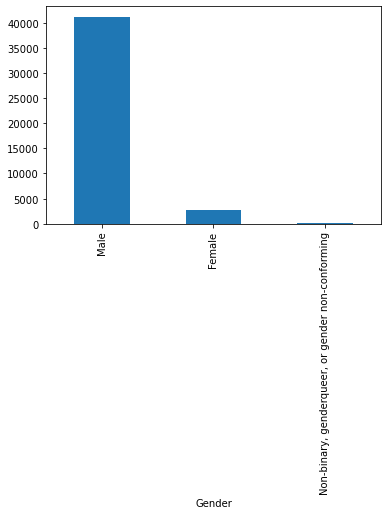

In [106]:
#%% Hypothesis for US male and female developers equally paid
#Code is designed in such way can compare for any country.

#Performing T test because assuming the sample is representative of actual population parameters. 

df.dropna(subset=['ConvertedSalary'], inplace=True)
df_allgender=df.groupby(['Gender']).count()
df_allgender.sort_values(by=['Respondent'], ascending=False, inplace=True)
df_allgender.iloc[0:3, 0].plot.bar()

df_allgender=df_allgender.T
df_gender= df_allgender[['Female', 'Male']]
df_gender=df_gender.iloc[0, :]

df_female= df[df['Gender']== 'Female']
df_male= df[df['Gender']== 'Male']
femaleSalaries_df= df_female[['ConvertedSalary']]
maleSalaries_df= df_male[['ConvertedSalary']]

t,p= stats.ttest_ind(femaleSalaries_df, maleSalaries_df)
print(p)

#As p<0.05, we can reject the Null Hypothesis, but we don't have enough evidence to prove that male and female are equally paid.

# PCA

In [107]:
# Calcuating zscore for normalizing the dataset
zscoredData = stats.zscore(X)

In [110]:
from sklearn.decomposition import PCA

pca = PCA().fit(zscoredData)
eigValues = pca.explained_variance_
loadings_v = pca.components_
u = pca.fit_transform(zscoredData)
covarExplained = (sum(eigValues[:10])/sum(eigValues))*100
covarExplained

19.50572115100008

In [111]:
eigValues>1 #50 columns
X_transformed = u[:,0:50]
X_transformed.shape

(37268, 50)

Text(0, 0.5, 'Eigenvalues')

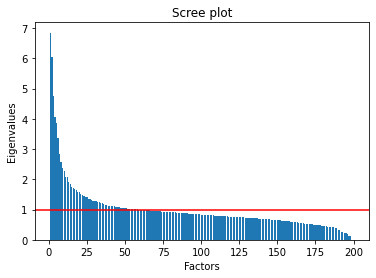

In [112]:
import matplotlib.pyplot as plt

numPredictors = X.shape[1]
plt.bar(np.linspace(1,numPredictors,numPredictors),eigValues)
plt.axhline(y=1, color='r', linestyle='-')
plt.title('Scree plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')

In [114]:
maxFeat=[]
for i in range(47):
    maxFeat.append(np.argmax(loadings_v[i,:]*-1))
set(maxFeat)

{3,
 5,
 6,
 8,
 10,
 11,
 12,
 13,
 17,
 19,
 22,
 23,
 26,
 30,
 35,
 49,
 51,
 92,
 97,
 98,
 121,
 125,
 128,
 129,
 134,
 142,
 145,
 148,
 149,
 152,
 153,
 154,
 169,
 176,
 180,
 183,
 190,
 191,
 192,
 197,
 199}

# Clustering


In [115]:
X.loc[X['JobSatisfaction'] <= 3.0, 'JobSatisfaction'] = 0
X.loc[X['JobSatisfaction'] > 3.0, 'JobSatisfaction'] = 1
X['JobSatisfaction'].value_counts()

1.0    26184
0.0    11084
Name: JobSatisfaction, dtype: int64

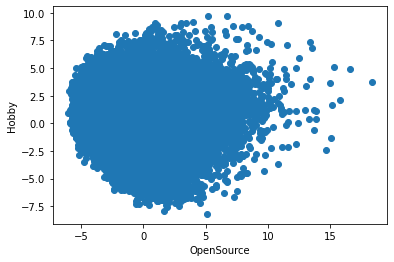

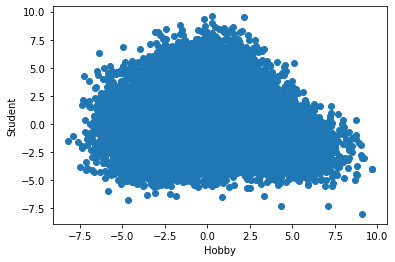

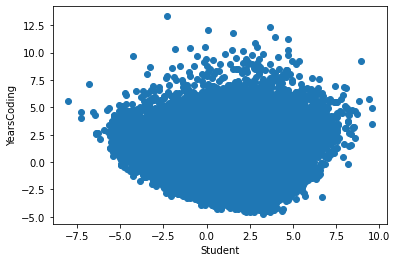

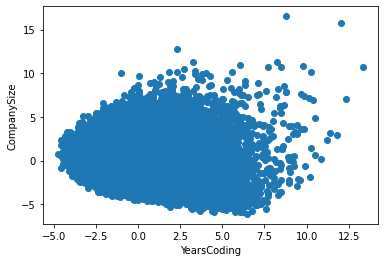

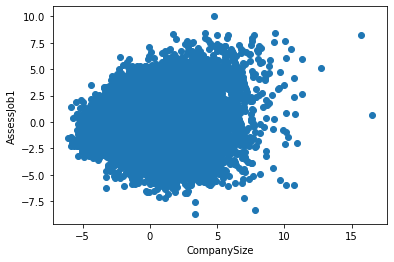

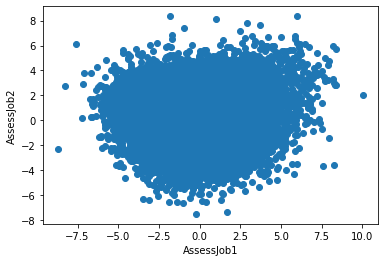

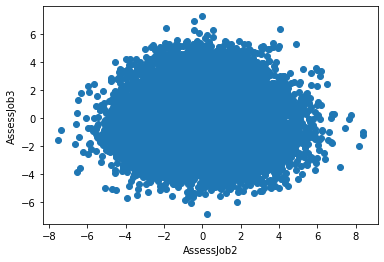

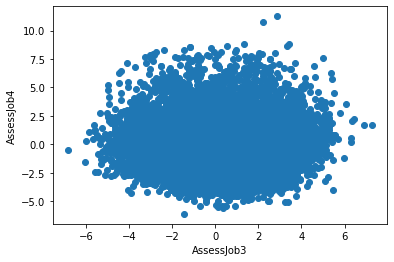

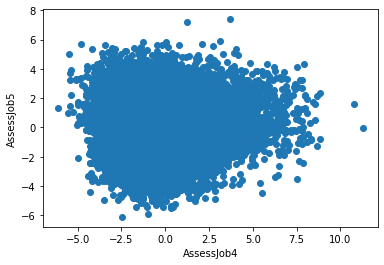

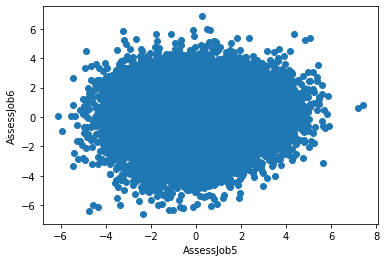

In [116]:
col=X.columns
for i in range(10):
    plt.figure()
    f1=col[i]
    f2=col[i+1]
    plt.scatter(X_transformed[:,i], X_transformed[:,i+1])
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.show()

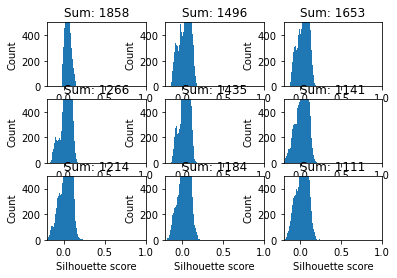

In [117]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1]) # init container to store sums
Q[:] = np.NaN # convert to NaN

ans=[]
plt.figure()
# Compute kMeans:
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = KMeans(n_clusters = int(ii)).fit(X_transformed) # compute kmeans
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    my_dict = {cCoords[i, 0]: np.where(cId== i)[0] for i in range(kMeans.n_clusters)}
    ans.append(my_dict)
    s = silhouette_samples(X_transformed,cId) # compute the mean silhouette coefficient of all samples
    # print(s.shape)
    Q[ii-2] = sum(s) # take sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=100) 
    plt.xlim(-0.2,1)
    plt.ylim(0,500)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2])))

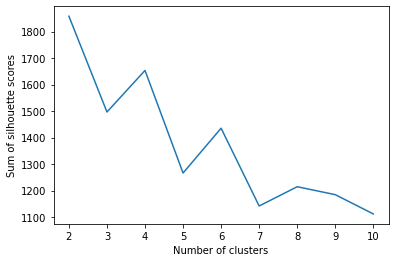

In [127]:
plt.figure()
plt.plot(np.linspace(2,10,numClusters),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

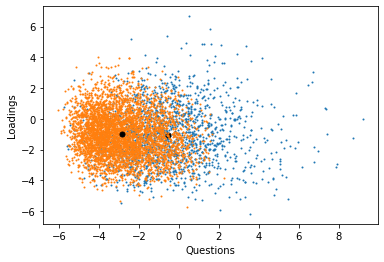

In [128]:
c= (np.argmax(Q)+2)
#Which two features do you want to visualize
v=[0,2]
plt.figure()
indexVector = np.linspace(1,c,c) 
for ii in indexVector:
    plotIndex = np.argwhere(cId == int(ii-1))
    plt.plot(u[plotIndex,v[0]],u[plotIndex,v[1]],'o',markersize=1)
    plt.plot(cCoords[int(ii-1),v[0]],cCoords[int(ii-1),v[1]],'o',markersize=5,color='black')  
    plt.xlabel('Questions')
    plt.ylabel('Loadings')

In [129]:
kMeans = KMeans(n_clusters = 2).fit(X_transformed)
y_pred=kMeans.fit_predict(X_transformed)
y_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

# Classification

In [130]:
X_transformed

array([[-0.68586667,  4.22211143, -2.90254614, ..., -0.00794661,
        -0.03772511,  0.00446646],
       [-3.10485626, -0.90270874, -0.06370912, ...,  1.35767865,
         1.61343151, -0.67296464],
       [ 0.05142156, -0.92866016,  0.11505253, ..., -0.00682813,
        -0.23074653, -0.88473096],
       ...,
       [ 3.01196229, -1.75566116,  1.95811169, ...,  0.11183981,
        -0.16458308,  0.47807674],
       [-3.01564208,  2.60628849,  2.24644421, ...,  0.22466506,
         0.48897615, -1.64088123],
       [-3.37623021, -2.01326199, -2.25656654, ...,  0.21549133,
         0.28330975,  0.01061068]])

In [131]:
df=pd.DataFrame(X_transformed)
df['cluster']=y_pred
df['cluster'].value_counts()

0    24181
1    13087
Name: cluster, dtype: int64

In [132]:
Y=X['JobSatisfaction']
Y

1        0.0
4        1.0
5        1.0
6        1.0
8        1.0
        ... 
71523    1.0
71524    1.0
71526    1.0
71529    1.0
71530    0.0
Name: JobSatisfaction, Length: 37268, dtype: float64

In [133]:
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test=train_test_split(X_transformed,Y)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
# y_hat=clf.predict(X_test,y_test)
print(clf.score(X_test, y_test))

0.8573575185145433


In [134]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)
print(clf.score(X_test, y_test))

0.8994311473650317


In [126]:
from sklearn.svm import SVC
kernels = ['linear','rbf','poly']
for kernel in kernels:
    clf=SVC(kernel=kernel)
    clf.fit(X_train,y_train)
    print(kernel,clf.score(X_test, y_test))

linear 0.8988944939358162
rbf 0.8940646130728775
poly 0.8850488354620586


# Regression


In [136]:
X_new=X
X_new.shape

(37268, 200)

In [137]:
Y=X['ConvertedSalary']
Y

1         70841.0
4         21426.0
5         41671.0
6        120000.0
8        250000.0
           ...   
71523    134000.0
71524    165000.0
71526     64417.0
71529    160000.0
71530    107500.0
Name: ConvertedSalary, Length: 37268, dtype: float64

In [138]:
sc=StandardScaler()
sc.fit(X_new)
X_new=sc.transform(X_new)
X_train,X_test,y_train,y_test=train_test_split(X_new,Y)

In [139]:
alphas = [0.0, 1e-8, 1e-5, 0.1, 1, 10]
alphaErrMap = {}
for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X_train,y_train)
    df_Y_test_pred = reg.predict(X_test)
    testing_error = mean_squared_error(y_test, df_Y_test_pred)
    # iI) testing error
    print("testing error",alpha, testing_error)
    alphaErrMap[alpha] = testing_error

optimal_alpha = min(alphaErrMap, key=alphaErrMap.get)
print("optimal_alpha",optimal_alpha,alphaErrMap[optimal_alpha])
pd.DataFrame(df_Y_test_pred, y_test)

testing error 0.0 3.5958916892151516e-09
testing error 1e-08 2.365465064397852e-09
testing error 1e-05 5.800764263944243e-09
testing error 0.1 0.5800262266436259
testing error 1 57.99854344635064
testing error 10 5795.77749828278
optimal_alpha 1e-08 2.365465064397852e-09


,0
ConvertedSalary,
90000.0,89993.811941
134627.0,134629.529397
180000.0,179979.840193
90000.0,90017.863829
200000.0,199989.057065
...,...
124000.0,123995.460041
54173.0,54184.950735
1000000.0,999655.461548


In [140]:
alphas = [1e-3, 1e-2, 1e-1, 1]

for alpha in alphas:
    est=make_pipeline(Lasso(alpha=alpha))
    est.fit(X_train, y_train)
    Y_hat=est.predict(X_test)
    print(est.score(X_test, y_test))


0.9999999778132607
0.9999999779628922
0.9999999793861275
0.9999999901917171


In [141]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X_train, y_train)
Y_hat=est.predict(X_test)
print(regr.score(X_test, y_test))
pd.DataFrame(Y_hat, y_test)

0.9999751118451585


,0
ConvertedSalary,
90000.0,9.000796e+04
134627.0,1.346758e+05
180000.0,1.800376e+05
90000.0,8.999115e+04
200000.0,1.999874e+05
...,...
124000.0,1.239851e+05
54173.0,5.418879e+04
1000000.0,1.000006e+06


In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
results = cross_val_score(xg_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(results)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
# y_test_pred = xg_reg.predict(X_test)
# mse = mean_squared_error(y_test_pred, y_test)
# print(results, mse)

# Summary and Conclusions(EDA)

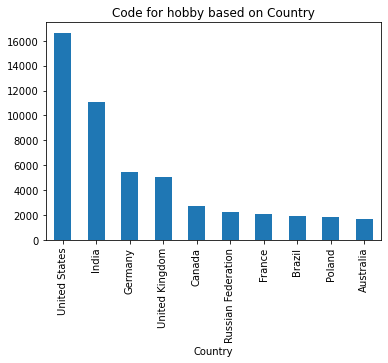

In [145]:
df = pd.read_csv("stackoverflow_data.csv")
#Some facts about Does Developer Code For Hobby?
codeforHobby_df= df[df['Hobby']== 'Yes']

# Which country code for Hobby most?
codeforHobbyCountry_df= codeforHobby_df.groupby('Country').count()
codeforHobbyCountry_df.sort_values(by=['Respondent'], ascending=False, inplace=True)

codeforHobbyCountry_df.iloc[0:10, 0].plot.bar()
plt.title('Code for hobby based on Country')
plt.show()

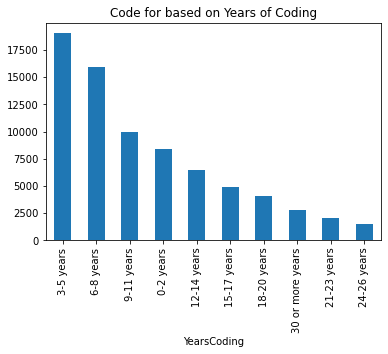

In [146]:
# How many years are developer coding for Hobby most?
codeforHobbyYearsCoding_df= codeforHobby_df.groupby('YearsCoding').count()
codeforHobbyYearsCoding_df.sort_values(by=['Respondent'], ascending=False, inplace=True)

codeforHobbyYearsCoding_df.iloc[0:10, 0].plot.bar()
plt.title('Code for based on Years of Coding')
plt.show()

Text(0.5, 1.0, 'How many Developers contribute to opensource')

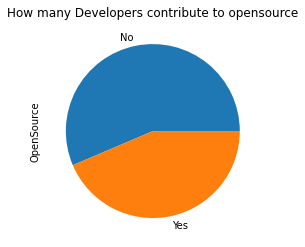

In [147]:
#How many Developers contribute to opensource

opensource_df= df['OpenSource'].value_counts()
opensource_df.plot.pie()
plt.title('How many Developers contribute to opensource')

Text(0.5, 1.0, 'Top Programming languages on which most developers have worked on')

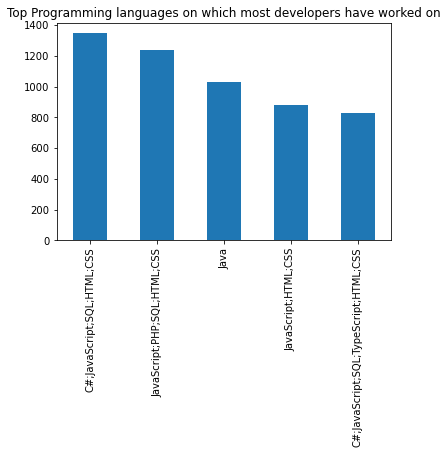

In [148]:
#Top Programming languages on which most developers have worked on
language_df= df['LanguageWorkedWith'].value_counts()
language_df.iloc[0:5].plot.bar()
plt.title('Top Programming languages on which most developers have worked on')


Text(0.5, 1.0, 'Top Desired Databases on which most developers want to work on')

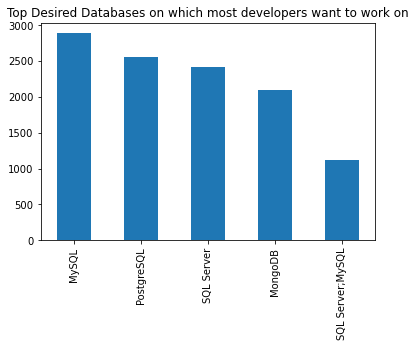

In [149]:
#Top Desired Databases on which most developers want to work on
desiredDatabase_df=df['DatabaseDesireNextYear'].value_counts()
desiredDatabase_df.iloc[0:5].plot.bar()
plt.title('Top Desired Databases on which most developers want to work on')


Text(0.5, 1.0, 'Developers opinion on AI Is Future')

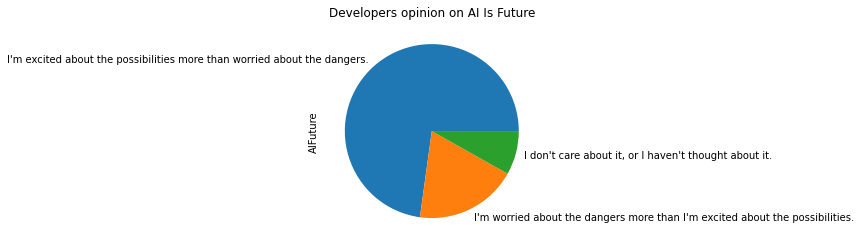

In [150]:
#Something about AI
#What Does Developer think about 'AI is Future'?

AI_df= df['AIFuture'].value_counts()
AI_df.plot.pie()
plt.title('Developers opinion on AI Is Future')


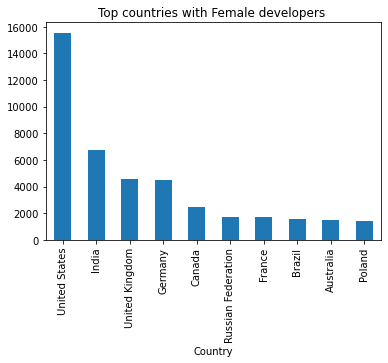

In [151]:
# Top countries with Female developers 

female_df= df.groupby('Country')['Gender', 'Respondent'].count()
female_df.sort_values(by=['Gender'], ascending=False, inplace=True)

female_df.iloc[0:10, 0].plot.bar()
plt.title('Top countries with Female developers ')
plt.show()
